<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 60000
Test size: 10000


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"Clases:\n{dict(zip(unique, counts))}")

Clases:
{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


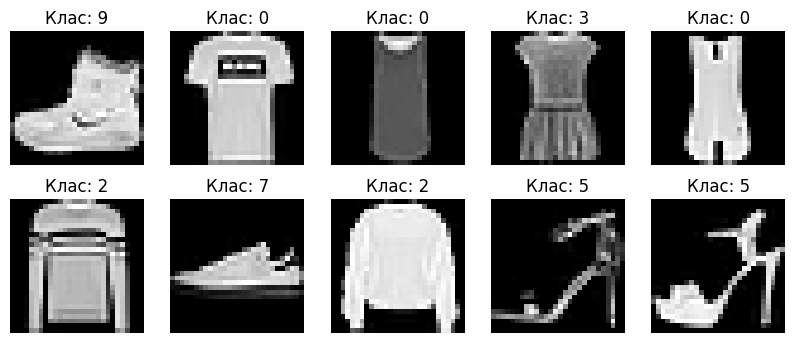

In [7]:
# Візуалізація кількох зображень
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Клас: {y_train[i]}")
    ax.axis('off')
plt.show()

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
def create_model(
    hidden_layers: int = 2,
    hidden_units: int = 128,
    hidden_activation: str = "relu",
    kernel_initializer: str = "he_normal",
    use_l2: bool = False, use_dropout: bool = False,
    optimizer: str = "adam",
):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28, 1)))

    model.add(keras.layers.Flatten())

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(
            hidden_units,
            activation=hidden_activation,
            kernel_initializer=kernel_initializer,
            kernel_regularizer=(keras.regularizers.l2() if use_l2 else None)
        ))
        if use_dropout:
            model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
model = KerasClassifier(model=create_model, verbose=0)

In [13]:
param_grid = {
    'model__optimizer': ['adam'],
    'model__hidden_layers': [1, 3],
    'model__hidden_units': [32, 64],
    'model__hidden_activation': ['relu', 'tanh'],
    'epochs': [5, 10],
    'batch_size': [32, 64],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best: 0.8829166666666666 using {'batch_size': 64, 'epochs': 10, 'model__hidden_activation': 'tanh', 'model__hidden_layers': 1, 'model__hidden_units': 64, 'model__optimizer': 'adam'}


In [14]:
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8703
